In [18]:
%matplotlib inline
import os
import numpy as np


from utils import features, vis
from matplotlib import pyplot as plt

from sklearn import ensemble, preprocessing, metrics
from sklearn.externals import joblib 

In [19]:
# path
features_dir = 'Dataset/features'
result_dir = 'result'

if not os.path.exists(result_dir):
    os.makedirs(result_dir)
        
# feature name
FEATURE_NAMES = [
        'pitch_mean',
        'pitch_lowest',
        'num_pitches',
        'poly_ratio',
        'duratoin_mean',
        'duratoin_std']

# instruments
INSTR_CLASS = ['melody', 'drum', 'bass', 'other']
INSTR_COLOR = ['blue', 'tomato', 'green', 'gold']


# list files
file_list = []
for root, _, files in os.walk(features_dir):
    for file in files:
        if file.endswith(".npz"):
             file_list.append(os.path.join(root, file))
                
# print to check
for idx, file in enumerate(file_list):
    print(idx, file) 

0 Dataset/features/Deluge_Melody.npz
1 Dataset/features/Miyako_Melody.npz
2 Dataset/features/Once I Loved_Piano.npz
3 Dataset/features/Five-o-Two Blues_Melody.npz
4 Dataset/features/Meditation_Piano.npz
5 Dataset/features/Shadow of Your Smile, The_Drums.npz
6 Dataset/features/Fall_Bass.npz
7 Dataset/features/Groovin_ High_Bass.npz
8 Dataset/features/Easy Living_Bass.npz
9 Dataset/features/Night Dreamer_Guitar.npz
10 Dataset/features/Icarus_Melody.npz
11 Dataset/features/Coral_Bass.npz
12 Dataset/features/Freedom Jazz Dance_Drums.npz
13 Dataset/features/Empathy_Guitar.npz
14 Dataset/features/Blues for Alice_Drums.npz
15 Dataset/features/Eighty-One_Melody.npz
16 Dataset/features/Played Twice_Piano.npz
17 Dataset/features/I_ll Remember April_Drums.npz
18 Dataset/features/Blue Comedy_Drums.npz
19 Dataset/features/God Bless the Child_Piano.npz
20 Dataset/features/Hello, Young Lovers_Guitar.npz
21 Dataset/features/Joy Spring_Melody.npz
22 Dataset/features/Confirmation_Drums.npz
23 Dataset/fe

1053 Dataset/features/Bewitched_Bass.npz
1054 Dataset/features/Here_s That Rainy Day_Bass.npz
1055 Dataset/features/Epistrophy_Piano.npz
1056 Dataset/features/Desafinado_Piano.npz
1057 Dataset/features/Lullaby of Birdland_Guitar.npz
1058 Dataset/features/Here_s That Rainy Day_Drums.npz
1059 Dataset/features/All My Tomorrows_Piano.npz
1060 Dataset/features/Giant Steps_Melody.npz
1061 Dataset/features/Night Has a Thousand Eyes, The_Melody.npz
1062 Dataset/features/Bewitched_Melody.npz
1063 Dataset/features/Alone Together_Guitar.npz
1064 Dataset/features/Black Narcissus_Piano.npz
1065 Dataset/features/My Favorite Things_Melody.npz
1066 Dataset/features/Real Guitarist_Bass.npz
1067 Dataset/features/I Remember Clifford_Drums.npz
1068 Dataset/features/Shadow of Your Smile, The_Guitar.npz
1069 Dataset/features/You Took Advantage of Me_Piano.npz
1070 Dataset/features/Brownout_Piano.npz
1071 Dataset/features/Long Ago and Far Away_Melody.npz
1072 Dataset/features/Michelle_Guitar.npz
1073 Dataset

In [20]:
num_all = len(file_list)
split_ratio = 0.7
num_train = int(num_all * split_ratio)
random_idx = np.random.permutation(num_all)
train_idx = random_idx[:num_train]
test_idx = random_idx[num_train:]

In [26]:
# training data
train_x = []
train_y = []
train_fn = []
for idx in train_idx:
    filename = file_list[idx]
    entry = np.load(filename)
    train_x.append(entry['x'])
    train_y.append(entry['y'])
    train_fn.append(filename)
    
# testing data
test_x = []
test_y = []
test_fn = []
for idx in test_idx:
    filename = file_list[idx]
    entry = np.load(filename)
    test_x.append(entry['x'])
    test_y.append(entry['y'])
    test_fn.append(filename)
    
# statitics
cnt_class_test = []
for idx in range(len(INSTR_CLASS)):
    cnt_class_test.append(test_y.count(idx))
    
cnt_class_train = []
for idx in range(len(INSTR_CLASS)):
    cnt_class_train.append(train_y.count(idx))


print('\n[*] Data Amount')
print('> total: {:5d} - {:s}'.format(
    num_all, 
    str([item1 + item2 for item1, item2 in zip(cnt_class_train, cnt_class_test)])))
print('> train: {:5d} - {:s}'.format(sum(cnt_class_train), str(cnt_class_train)))
print('>  test: {:5d} - {:s}'.format(sum(cnt_class_test), str(cnt_class_test)))


train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

print(train_x.shape)


[*] Data Amount
> total:  1094 - [200, 240, 240, 414]
> train:   765 - [135, 166, 173, 291]
>  test:   329 - [65, 74, 67, 123]
(765, 6)



[*] Result
> train accuracy: 1.0
> test accuracy: 0.9878419452887538


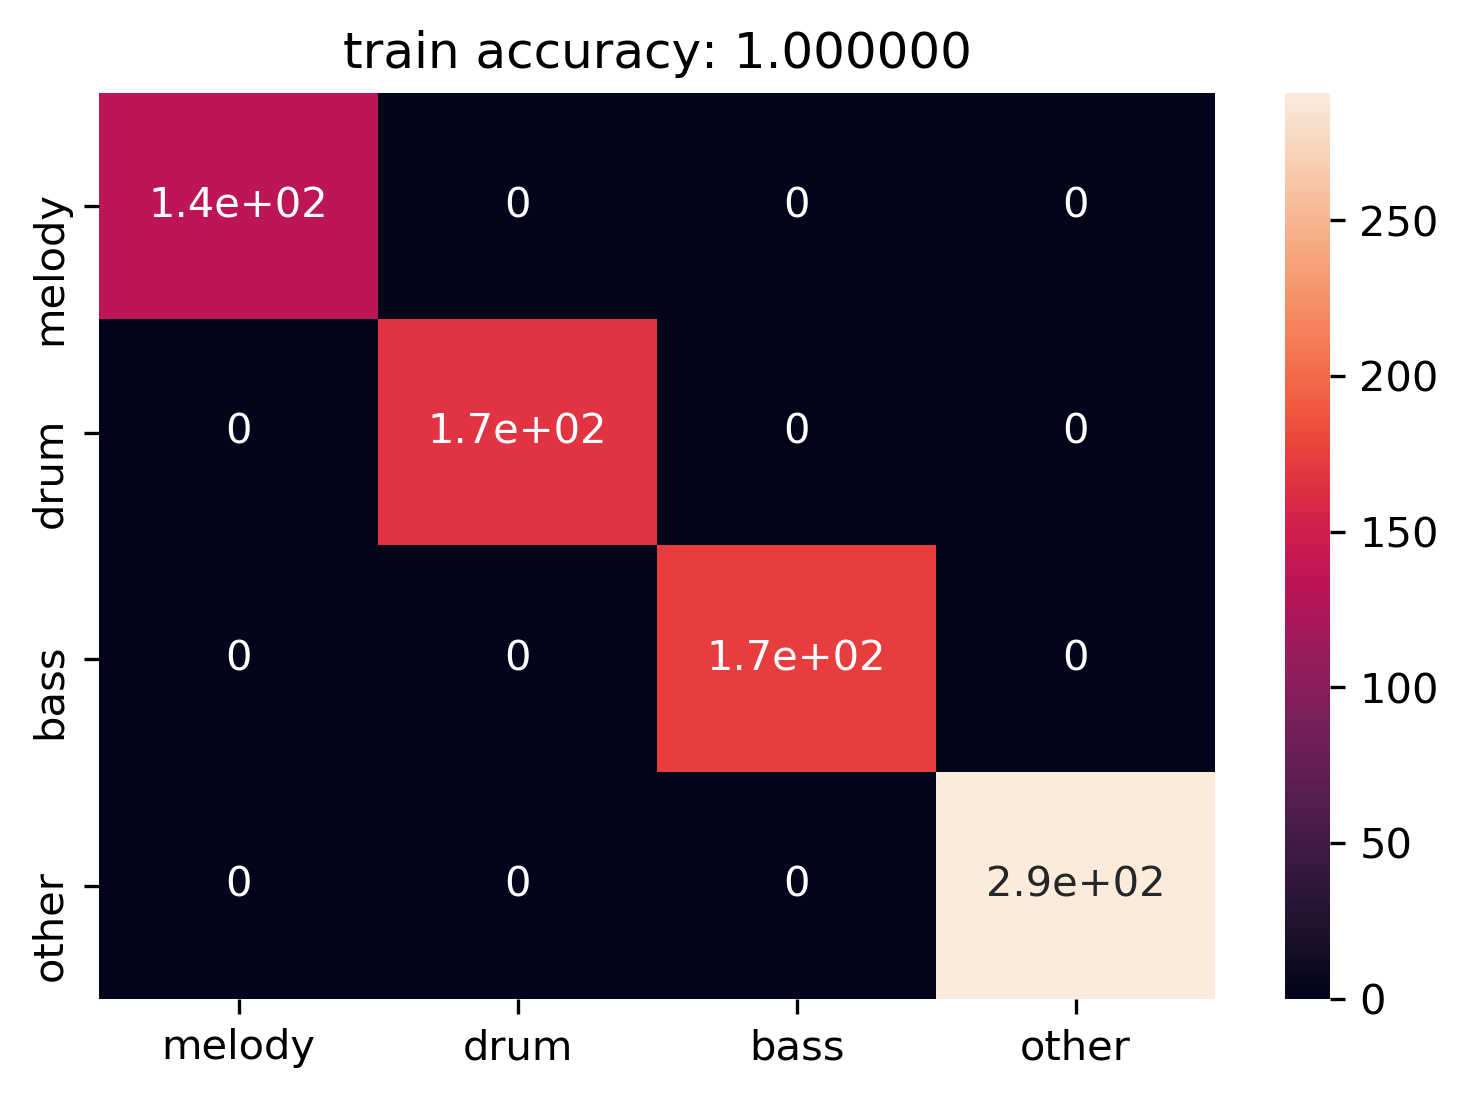

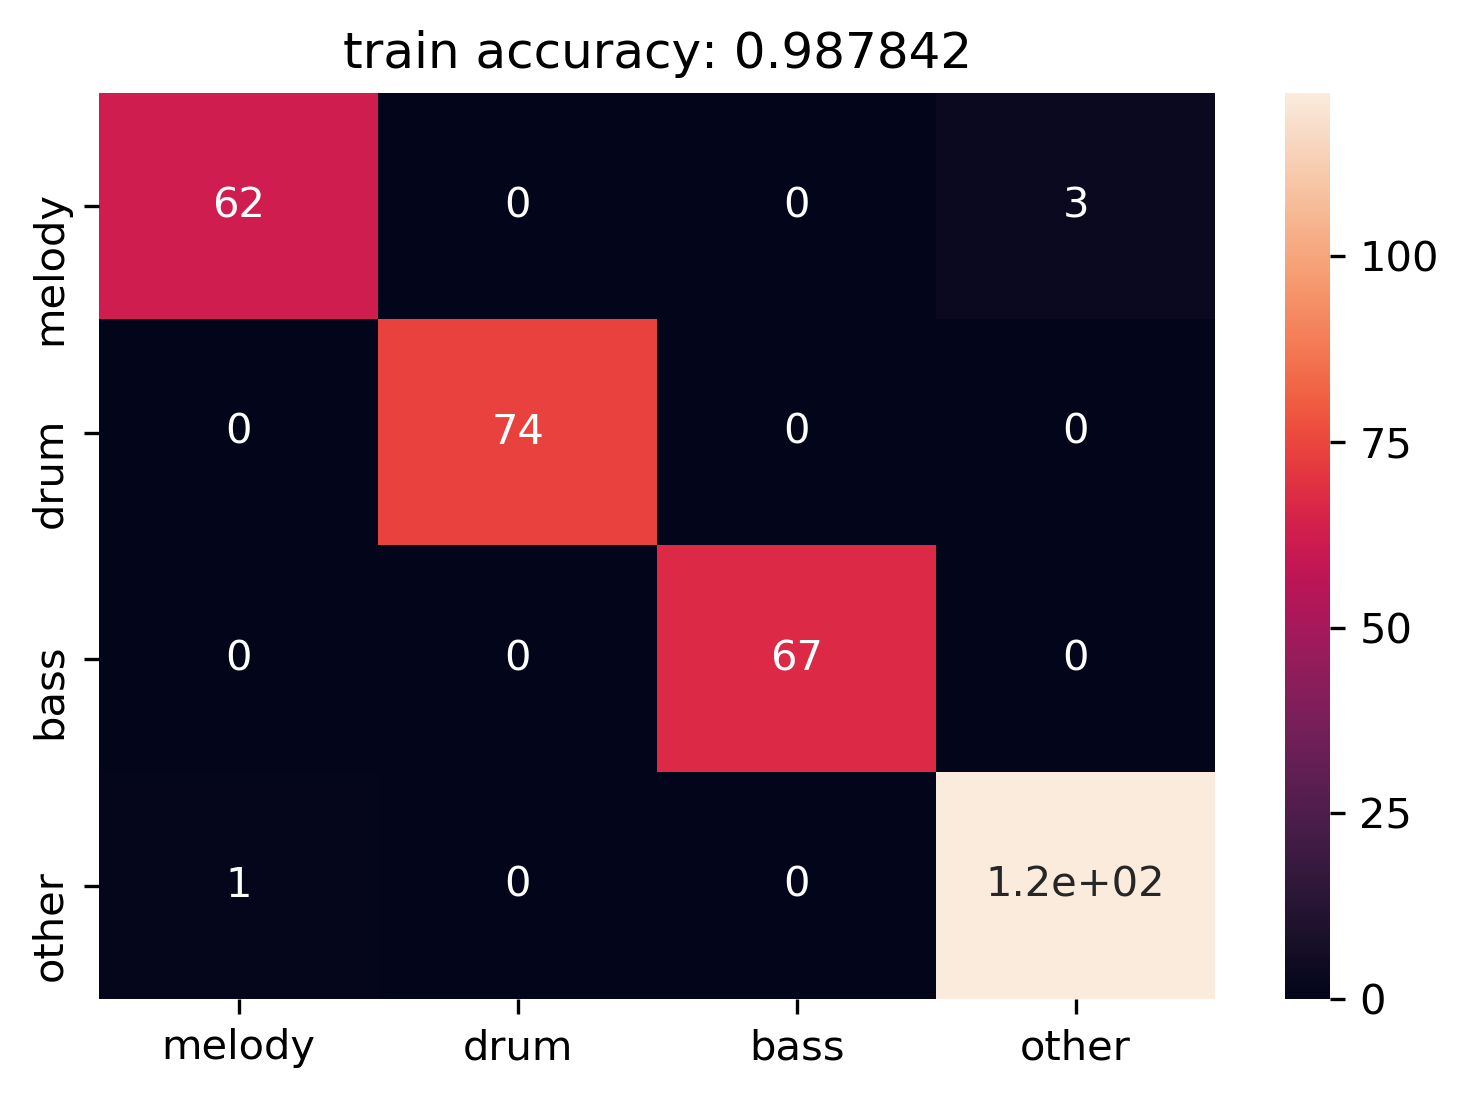

In [22]:
# build random forest
n_estimators = 100
forest = ensemble.RandomForestClassifier(n_estimators=n_estimators)
forest.fit(train_x, train_y)

# prediction
predict_test_y = forest.predict(test_x)
predict_train_y = forest.predict(train_x)

# save
model_name = os.path.join(result_dir, 'model.pkl')
joblib.dump(forest, model_name)

# accuracy
accuracy_test = metrics.accuracy_score(test_y, predict_test_y)
accuracy_train = metrics.accuracy_score(train_y, predict_train_y)
print('\n[*] Result')
print('> train accuracy:', accuracy_train)  
print('> test accuracy:', accuracy_test)  

# confusion table
# train

plt.figure(dpi=300)
vis.plot_confusion_table(train_y, predict_train_y, INSTR_CLASS)
fig_name = os.path.join(result_dir, 'confusion_train.png')
plt.savefig(fig_name)

# test
plt.figure(dpi=300)
vis.plot_confusion_table(test_y, predict_test_y, INSTR_CLASS)
fig_name = os.path.join(result_dir, 'confusion_test.png')
plt.savefig(fig_name)

In [23]:
print('--- train ---')
vis.diagnose_error(train_y, predict_train_y, train_fn, INSTR_CLASS)
print('--- test---')
vis.diagnose_error(test_y, predict_test_y, test_fn, INSTR_CLASS)

--- train ---

[*] Error Diagnosis
> No Error!
--- test---

[*] Error Diagnosis
> Error Index: [ 81 107 231 319]
> Error Files (gt, predicted)
    > Dataset/features/Ay, Arriba!_Melody.npz
      melody other

    > Dataset/features/How High the Moon_Melody.npz
      melody other

    > Dataset/features/Here_s That Rainy Day_Strings.npz
      other melody

    > Dataset/features/Yesterday_Melody.npz
      melody other



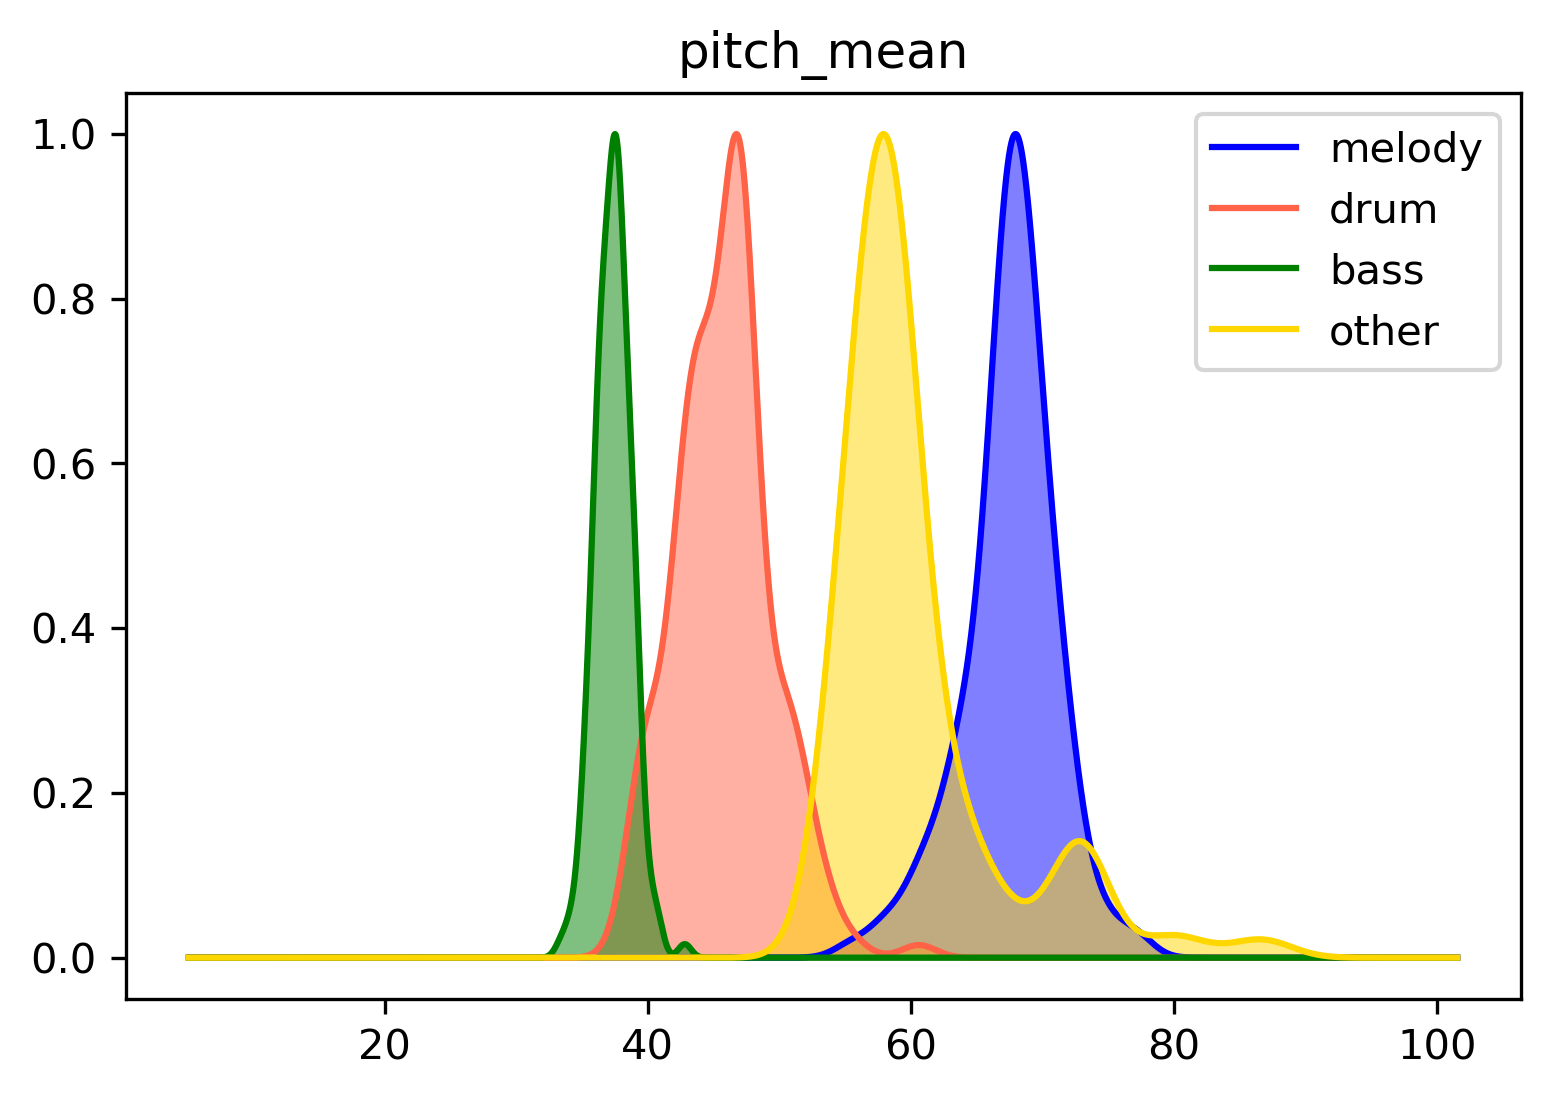

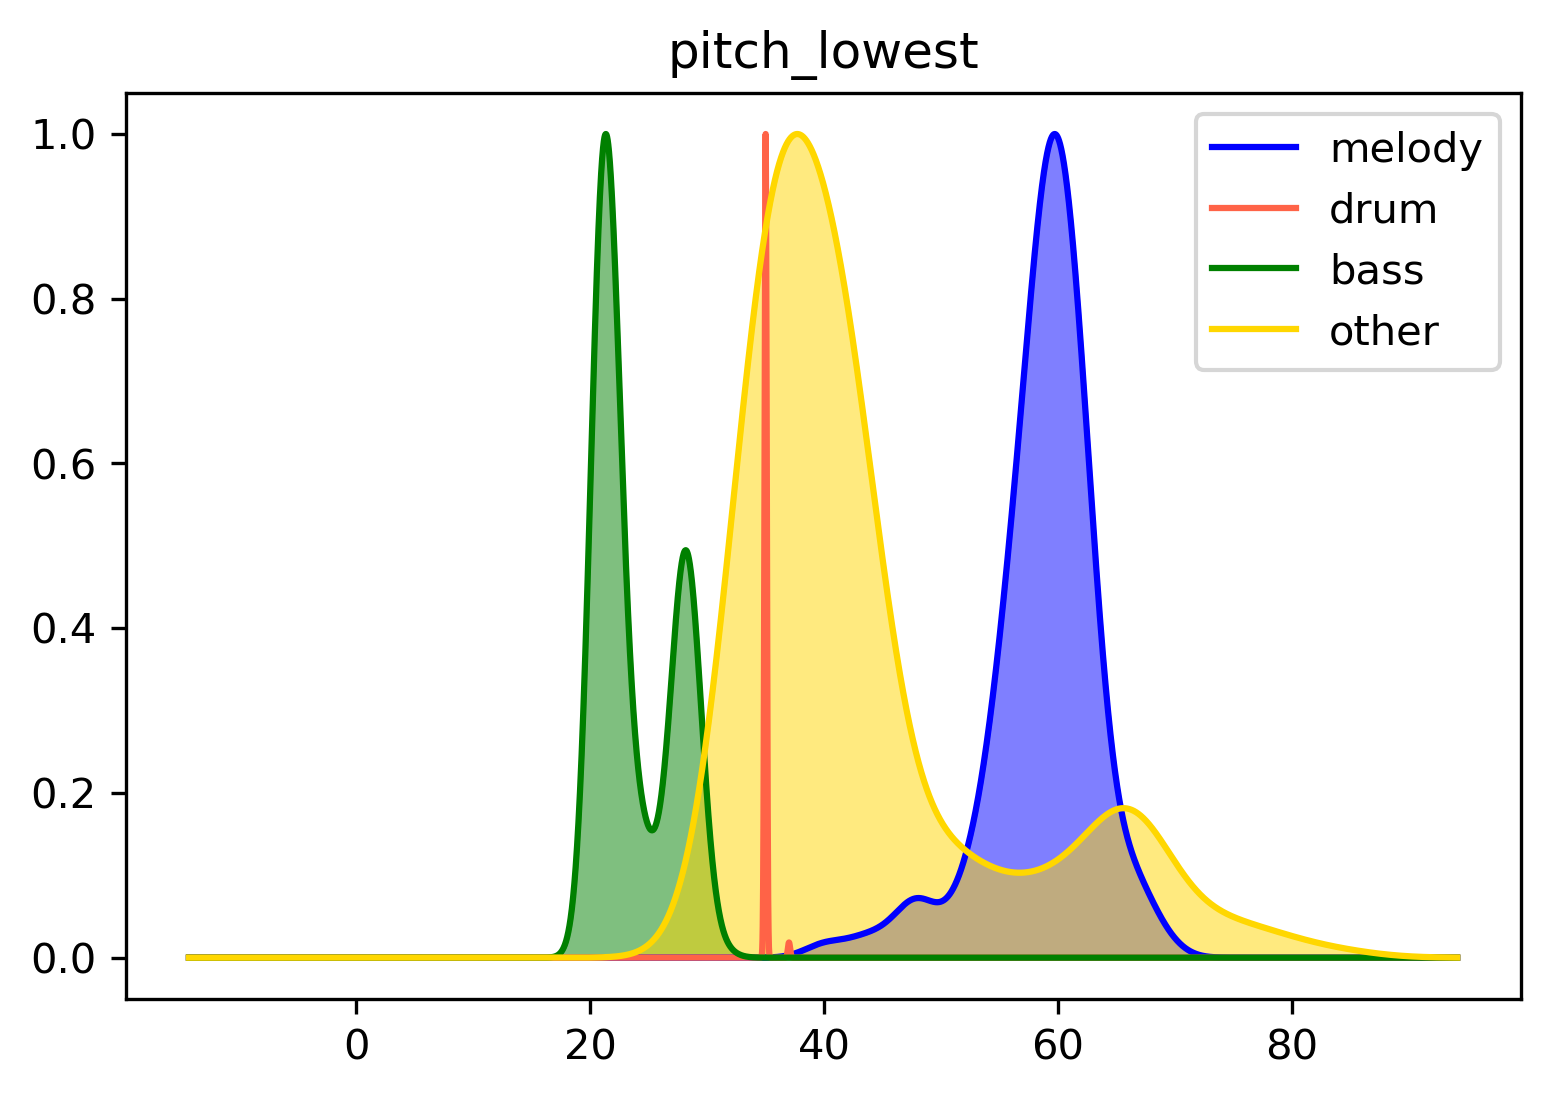

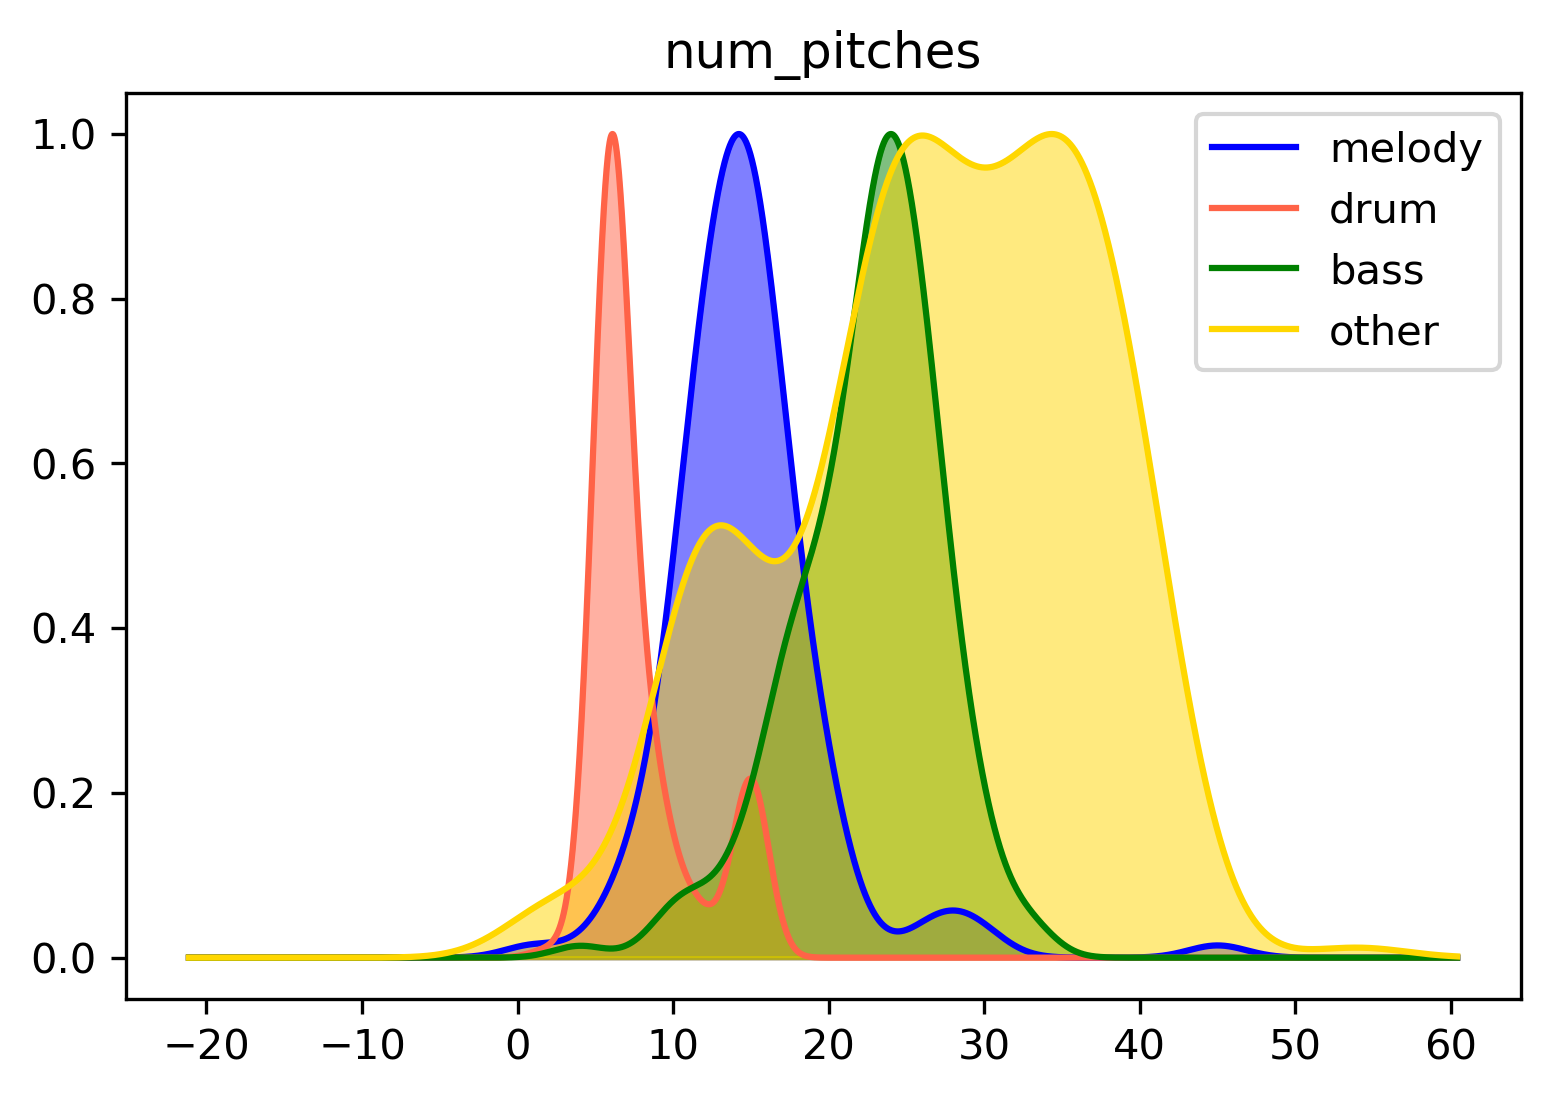

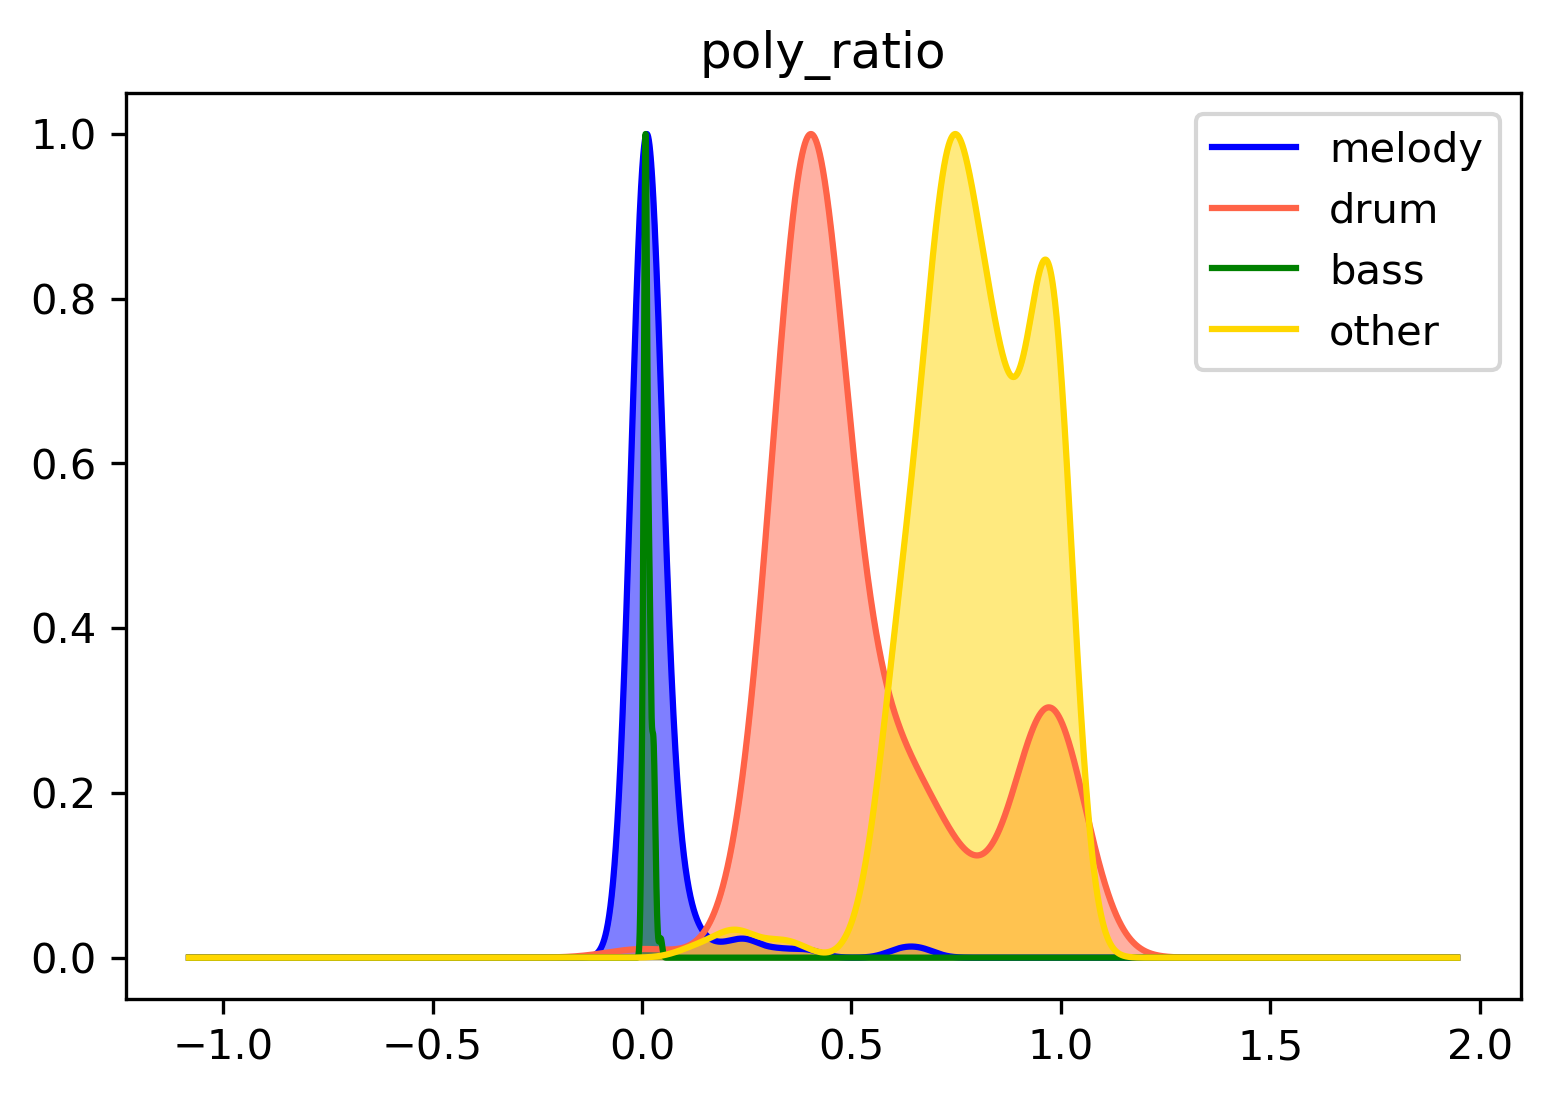

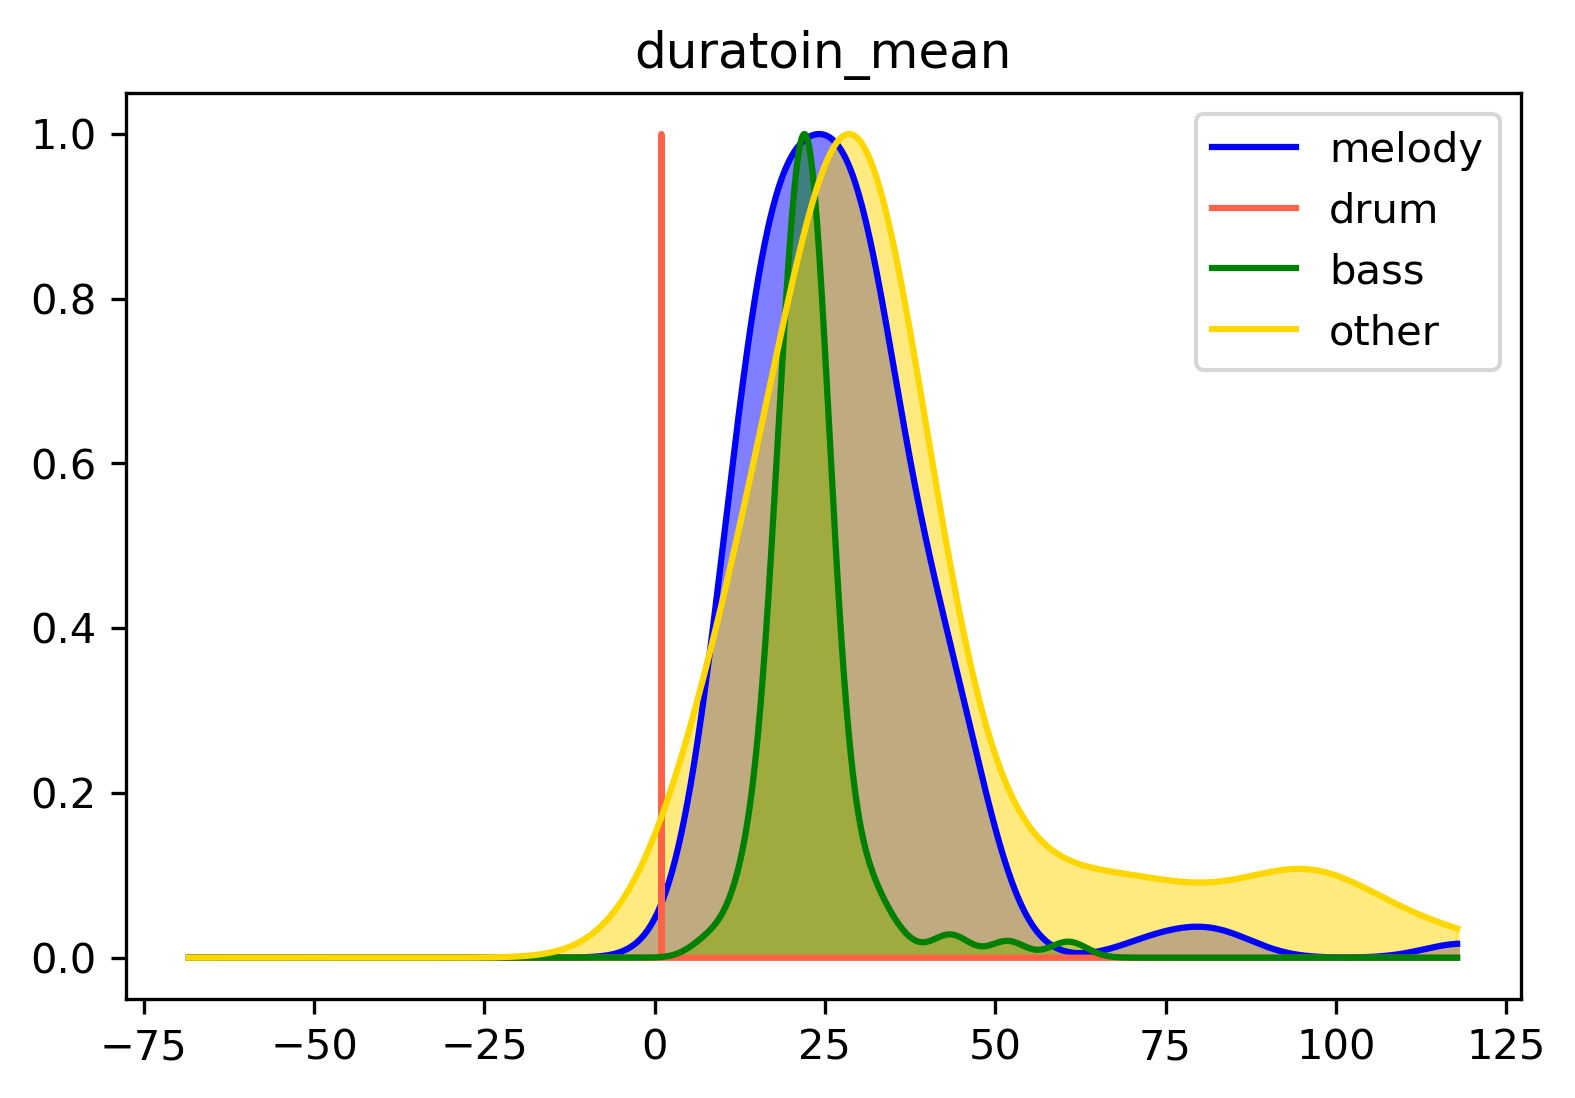

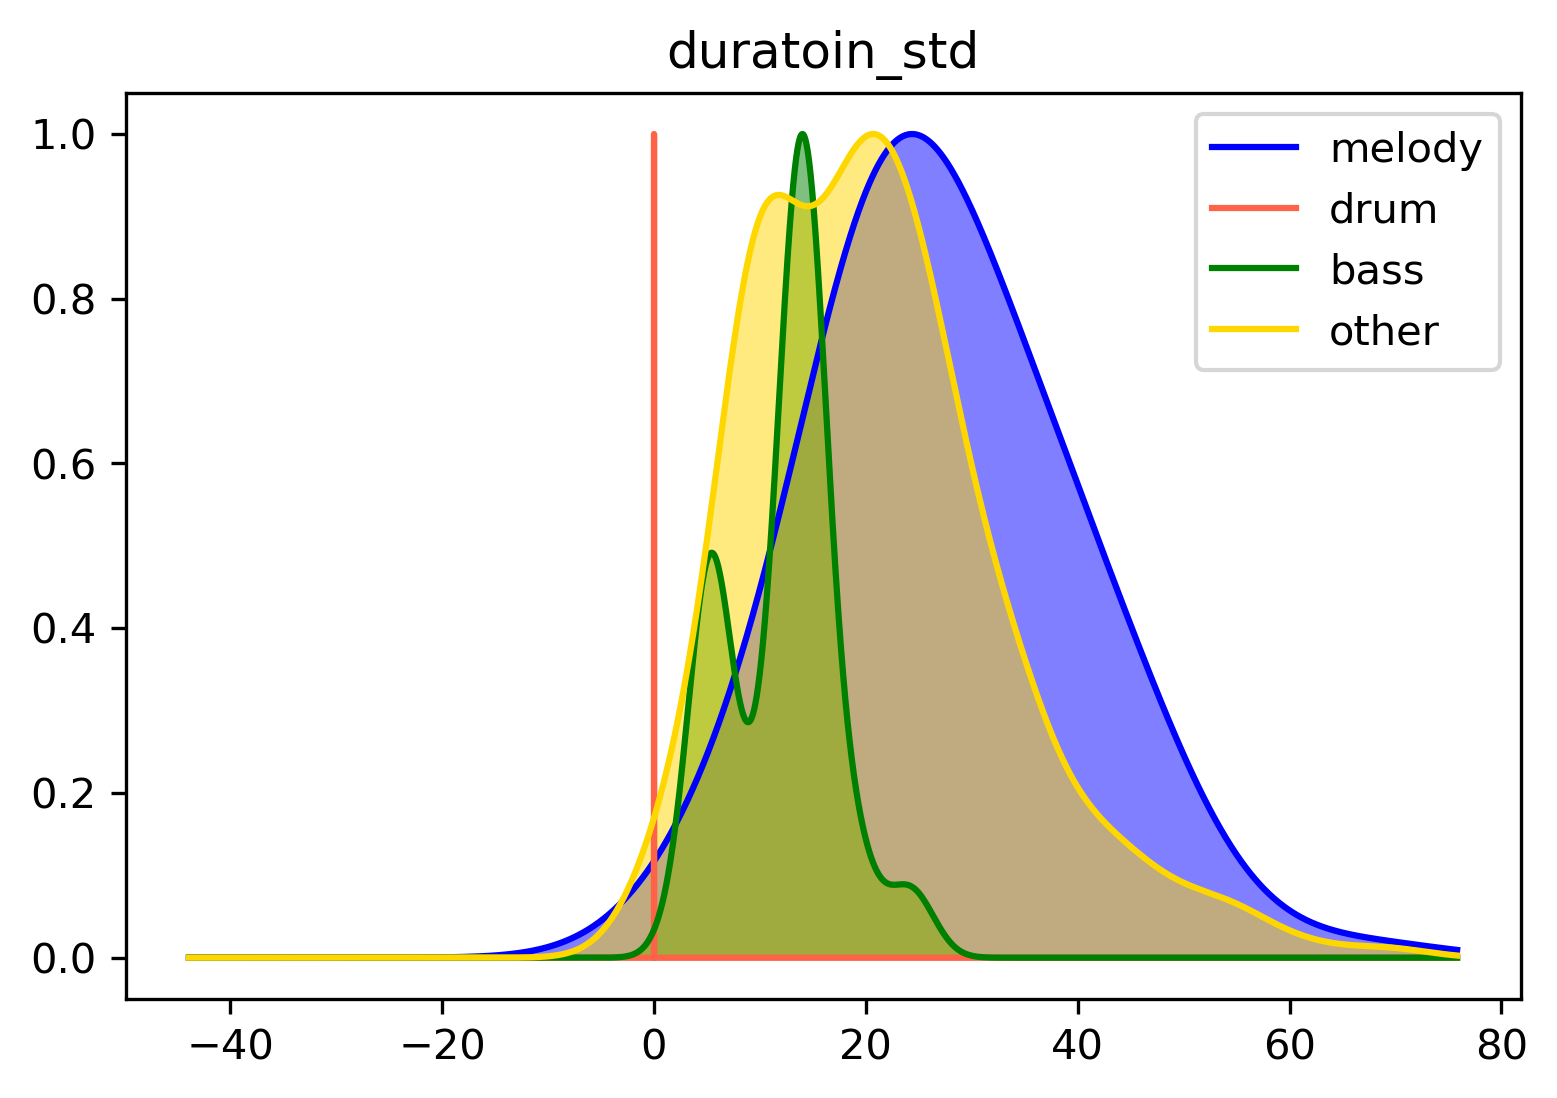

In [24]:

n_std = 4
for feature_idx in range(len(FEATURE_NAMES)):
    feature = train_x[:, feature_idx]
    mean = np.mean(feature)
    std = np.std(feature)
    x_range = (mean-std * n_std, mean+std * n_std)
    
    # plot
    plt.figure(dpi=300) 
    for instr_idx in range(len(INSTR_CLASS)):
        track_feature = feature[train_y == instr_idx]
        x_est, y_est = vis.estimate_pdf(track_feature, x_range=x_range)
        vis.plot_distribution(x_est, y_est, color=INSTR_COLOR[instr_idx], alpha='0.3', label=INSTR_CLASS[instr_idx])
        
    plt.title(FEATURE_NAMES[feature_idx])
    plt.legend(loc='upper right')
    fig_name = os.path.join(result_dir, FEATURE_NAMES[feature_idx] + '.png')
    plt.savefig(fig_name)
    

In [25]:
# test loaded model

loaded_model = joblib.load(model_name)
predict_loaded_y = loaded_model.predict(test_x)
accuracy_test = metrics.accuracy_score(test_y, predict_loaded_y)
print(accuracy_test)

0.9878419452887538
